<a href="https://colab.research.google.com/github/boreshkinai/fc-gaga/blob/master/FC_GAGA_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/projects/fc-gaga'
LOGDIR = "logs"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/projects/fc-gaga


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
print("Tensorflow version:", tf.__version__)


from dataset import Dataset
from model import Trainer, Parameters
from model import hyperparams_defaults as hyperparams_dict

Tensorflow version: 2.2.0


In [ ]:
hyperparams_dict["dataset"] = 'metr-la'
hyperparams_dict["horizon"] = 12
hyperparams_dict["history_length"] = 12

dataset = Dataset(name=hyperparams_dict["dataset"], horizon=hyperparams_dict["horizon"], history_length=hyperparams_dict["history_length"])

hyperparams_dict["num_nodes"] = dataset.num_nodes
hyperparams = Parameters(**hyperparams_dict)

In [ ]:
trainer = Trainer(hyperparams=hyperparams, logdir=LOGDIR)
trainer.fit(dataset=dataset)

Fitting model 1 out of 5, repeat=0;epochs=60;steps_per_epoch=800;num_stacks=3
Epoch 1/60


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


800/800 [==============================] - 39s 48ms/step - loss: 5.0537 - lr: 0.0010 - mae_val: 3.7209 - mae_test: 4.0370 - mae_val_h1: 3.0470 - mae_test_h1: 3.2134 - mape_val_h1: 9.2440 - rmse_val_h1: 5.5323 - mape_test_h1: 9.5991 - rmse_test_h1: 5.7430 - mae_val_h2: 3.2619 - mae_test_h2: 3.4630 - mape_val_h2: 9.6342 - rmse_val_h2: 5.9970 - mape_test_h2: 10.2164 - rmse_test_h2: 6.2906 - mae_val_h3: 3.4566 - mae_test_h3: 3.6537 - mape_val_h3: 10.5989 - rmse_val_h3: 6.4215 - mape_test_h3: 11.1188 - rmse_test_h3: 6.7197 - mae_val_h4: 3.3033 - mae_test_h4: 3.6072 - mape_val_h4: 9.9997 - rmse_val_h4: 6.5479 - mape_test_h4: 10.6968 - rmse_test_h4: 6.9206 - mae_val_h5: 3.4888 - mae_test_h5: 3.7909 - mape_val_h5: 10.8562 - rmse_val_h5: 6.9235 - mape_test_h5: 11.5326 - rmse_test_h5: 7.2950 - mae_val_h6: 3.9088 - mae_test_h6: 4.2124 - mape_val_h6: 12.6899 - rmse_val_h6: 7.8763 - mape_test_h6: 13.2118 - rmse_test_h6: 8.1810 - mae_val_h7: 3.7889 - mae_test_h7: 4.1190 - mape_val_h7: 12.0026 - rmse

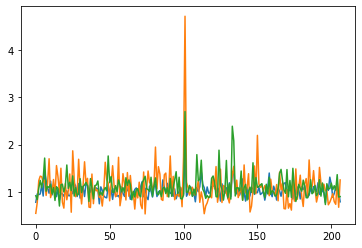

In [ ]:
node_to_plot = 101
model = 0

node_id = trainer.models[model].fcgaga_layers[0].node_id_em(np.arange(207))
node_embeddings_dp = np.matmul(node_id, np.transpose(node_id, [1,0]))
node_embeddings_dp = tf.math.exp(10*node_embeddings_dp) 
plt.plot(node_embeddings_dp[node_to_plot])

node_id2 = trainer.models[model].fcgaga_layers[1].node_id_em(np.arange(207))
node_embeddings_dp2 = np.matmul(node_id2, np.transpose(node_id2, [1,0]))
node_embeddings_dp2 = tf.math.exp(10*node_embeddings_dp2) 
plt.plot(node_embeddings_dp2[node_to_plot])

node_id3 = trainer.models[model].fcgaga_layers[2].node_id_em(np.arange(207))
node_embeddings_dp3 = np.matmul(node_id3, np.transpose(node_id3, [1,0]))
node_embeddings_dp3 = tf.math.exp(10*node_embeddings_dp3) 
plt.plot(node_embeddings_dp3[node_to_plot])

(3.0, 3.5)

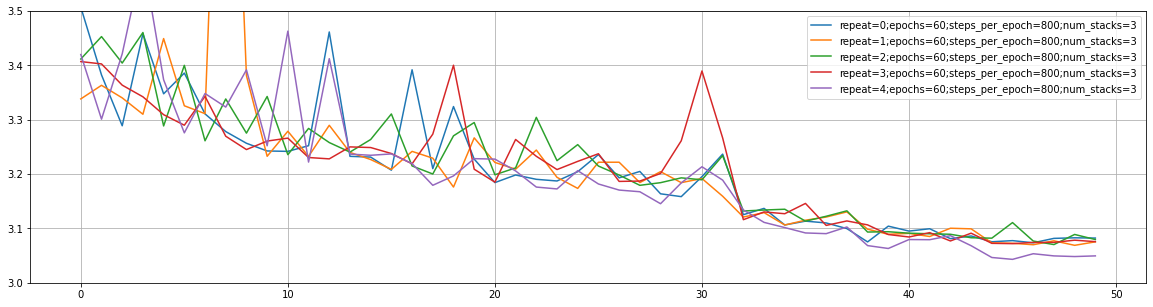

In [ ]:
import fnmatch

filt = "*"

plt.figure(figsize=(20,5))
legend = []
for i, h in enumerate(trainer.history):
    if fnmatch.fnmatch(trainer.folder_names[i], filt):
        plt.plot(h['mae_test'][10:])
        legend.append(trainer.folder_names[i])

plt.legend(legend)
plt.grid(True)
plt.ylim([3.0, 3.5])


In [ ]:
def insert_dict(d, k, v):
    previous = d.get(k, [])
    d[k] = previous + [v]
    return d

early_stop_mae_h_repeats = dict()
early_stop_mape_h_repeats = dict()
early_stop_rmse_h_repeats = dict()
early_stop_mae_h_ave = dict()
early_stop_mape_h_ave = dict()
early_stop_rmse_h_ave = dict()
for i, h in enumerate(trainer.history):
    early_stop_idx = np.argmin(h['mae_val'])
    early_stop_mae = np.round(h['mae_test'][early_stop_idx], decimals=3)
    print(f"Early stop test error model {trainer.folder_names[i]}:", "Avg MAE", early_stop_mae)
    for horizon in range(3, hyperparams.horizon+1, 3):

        early_stop_mae_h_repeats = insert_dict(early_stop_mae_h_repeats, k=horizon, v=h[f'mae_test_h{horizon}'][early_stop_idx])
        early_stop_mape_h_repeats = insert_dict(early_stop_mape_h_repeats, k=horizon, v=h[f'mape_test_h{horizon}'][early_stop_idx])
        early_stop_rmse_h_repeats = insert_dict(early_stop_rmse_h_repeats, k=horizon, v=h[f'rmse_test_h{horizon}'][early_stop_idx])
        
        print(f"Horizon {horizon} MAE:", np.round(early_stop_mae_h_repeats[horizon][-1], decimals=2), 
              f"Horizon {horizon} MAPE:", np.round(early_stop_mape_h_repeats[horizon][-1], decimals=2), 
              f"Horizon {horizon} RMSE:", np.round(early_stop_rmse_h_repeats[horizon][-1], decimals=2))

    for horizon in range(3, hyperparams.horizon+1, 3):
        early_stop_mae_h_ave[horizon] = np.round(np.mean(early_stop_mae_h_repeats[horizon]), decimals=2)
        early_stop_mape_h_ave[horizon] = np.round(np.mean(early_stop_mape_h_repeats[horizon]), decimals=2)
        early_stop_rmse_h_ave[horizon] = np.round(np.mean(early_stop_rmse_h_repeats[horizon]), decimals=2)

print()
print("Average MAE:", early_stop_mae_h_ave)
print("Average MAPE:", early_stop_mape_h_ave)
print("Average RMSE:", early_stop_rmse_h_ave)


Early stop test error model repeat=0;epochs=60;steps_per_epoch=800;num_stacks=3: Avg MAE 3.074
Horizon 3 MAE: 2.75 Horizon 3 MAPE: 7.23 Horizon 3 RMSE: 5.32
Horizon 6 MAE: 3.13 Horizon 6 MAPE: 8.59 Horizon 6 RMSE: 6.32
Horizon 9 MAE: 3.35 Horizon 9 MAPE: 9.43 Horizon 9 RMSE: 6.91
Horizon 12 MAE: 3.52 Horizon 12 MAPE: 10.15 Horizon 12 RMSE: 7.33
Early stop test error model repeat=1;epochs=60;steps_per_epoch=800;num_stacks=3: Avg MAE 3.069
Horizon 3 MAE: 2.76 Horizon 3 MAPE: 7.19 Horizon 3 RMSE: 5.36
Horizon 6 MAE: 3.11 Horizon 6 MAPE: 8.51 Horizon 6 RMSE: 6.33
Horizon 9 MAE: 3.34 Horizon 9 MAPE: 9.32 Horizon 9 RMSE: 6.9
Horizon 12 MAE: 3.51 Horizon 12 MAPE: 9.97 Horizon 12 RMSE: 7.29
Early stop test error model repeat=2;epochs=60;steps_per_epoch=800;num_stacks=3: Avg MAE 3.07
Horizon 3 MAE: 2.76 Horizon 3 MAPE: 7.24 Horizon 3 RMSE: 5.35
Horizon 6 MAE: 3.1 Horizon 6 MAPE: 8.59 Horizon 6 RMSE: 6.31
Horizon 9 MAE: 3.34 Horizon 9 MAPE: 9.58 Horizon 9 RMSE: 6.89
Horizon 12 MAE: 3.5 Horizon 1